In [17]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [18]:
df = pd.read_csv("df_weekly_pm.csv")
df = df.set_index('Date')
df_train, df_test = df[:"2020-01-01"], df["2020-01-01":]

In [19]:
df.head()

,PM2.5
Date,
2015-01-04,184.605000
2015-01-11,196.005714
2015-01-18,187.650000
2015-01-25,156.357143
2015-02-01,162.784286


In [20]:
start = len(df_train)
end = len(df_train)+len(df_test)-1
season = 52

In [21]:
y_hat = df_test.copy()
pred = []
df_arr = np.asarray(df["PM2.5"])
for i in range(start, end+1):
    pred.append(df_arr[i-season])
y_hat['s_naive_' + "PM2.5"] = pred

In [22]:
y_hat.head(10)

,PM2.5,s_naive_PM2.5
Date,,
2020-01-05,271.121429,282.411429
2020-01-12,139.477143,215.720000
2020-01-19,134.745714,239.195714
2020-01-26,150.867143,116.327143
2020-02-02,115.565714,166.567143
2020-02-09,149.545714,134.564286
2020-02-16,129.764286,152.758571
2020-02-23,106.280000,90.087143
2020-03-01,90.535714,80.320000


In [23]:
predictions = y_hat["s_naive_PM2.5"]
test = y_hat["PM2.5"]
evaluation_results = pd.DataFrame({'r2_score': r2_score(test, predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test, predictions)
evaluation_results['root_mean_squared_error'] = np.sqrt(mean_squared_error(test, predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test)/np.abs(test))*100 

In [24]:
evaluation_results

,r2_score,mean_absolute_error,root_mean_squared_error,mean_absolute_percentage_error
0,0.410597,31.497866,40.505684,51.447269


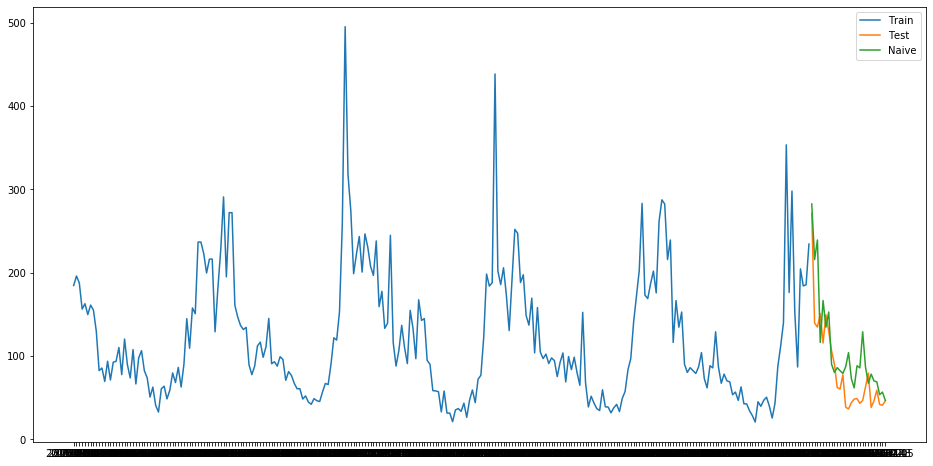

In [25]:
plt.figure(figsize=(16,8))
plt.plot(df_train['PM2.5'], label='Train')
plt.plot(df_test["PM2.5"], label='Test')
plt.plot(y_hat['s_naive_PM2.5'], label='Naive')
plt.legend()
# plt.savefig('images/pm-naive-forecast.png')
plt.show()